1. Посмотрим на fastqc без тримминга:

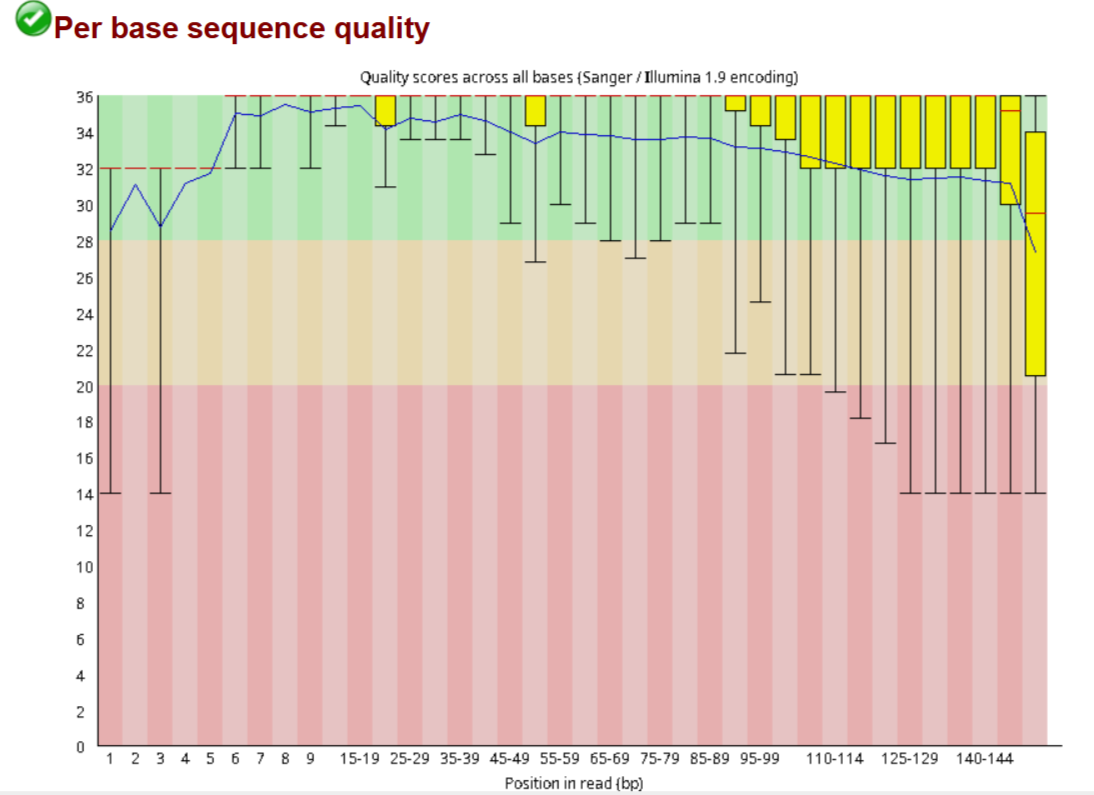

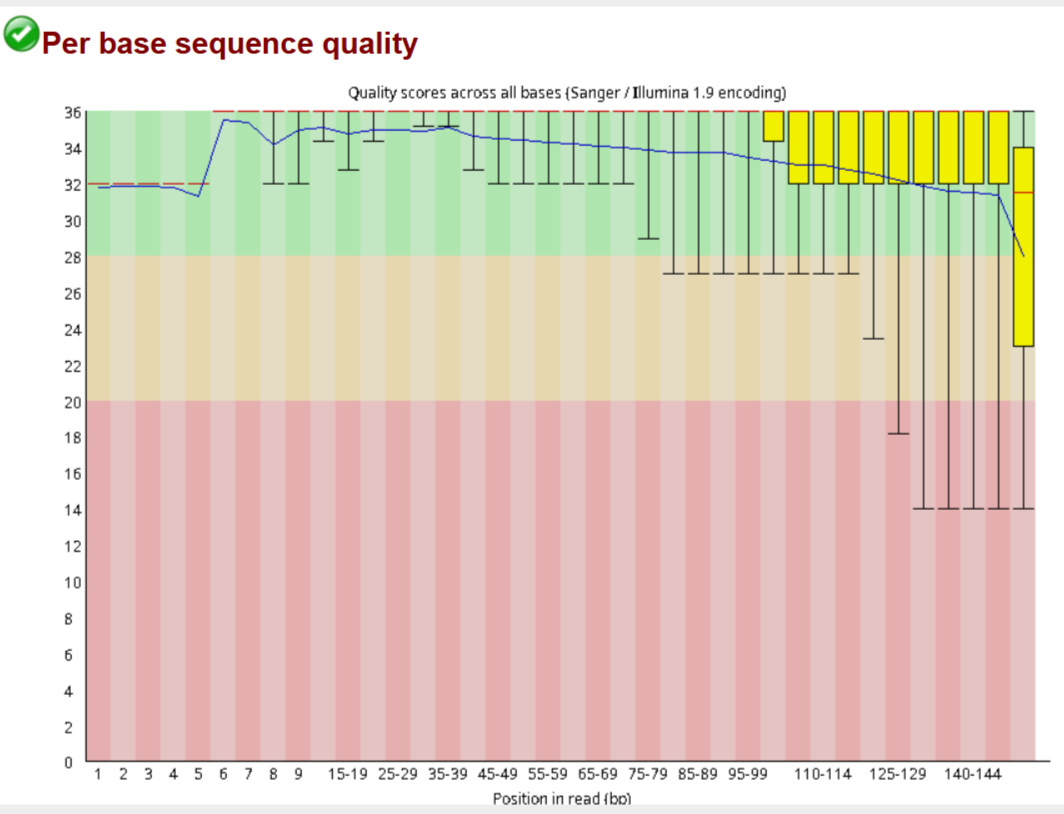

Видим, что качество практически во всех позициях хорошее, но можно улучшить в позициях 140-144.

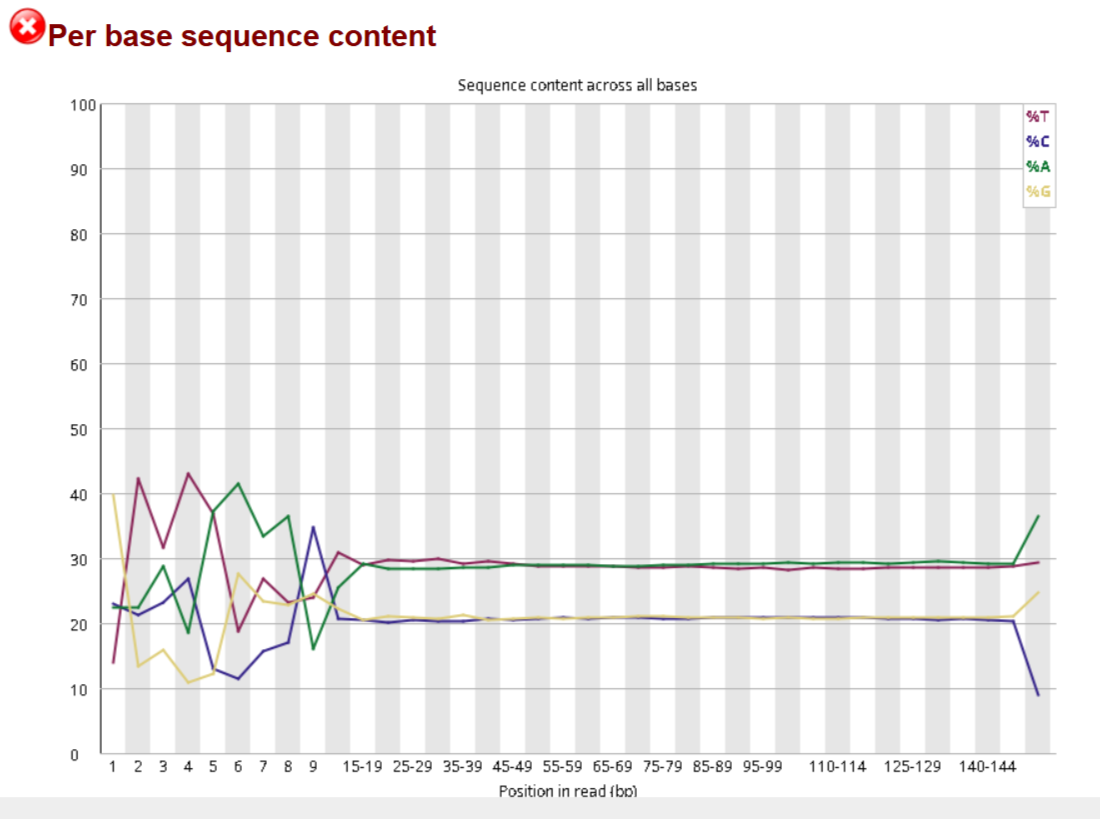

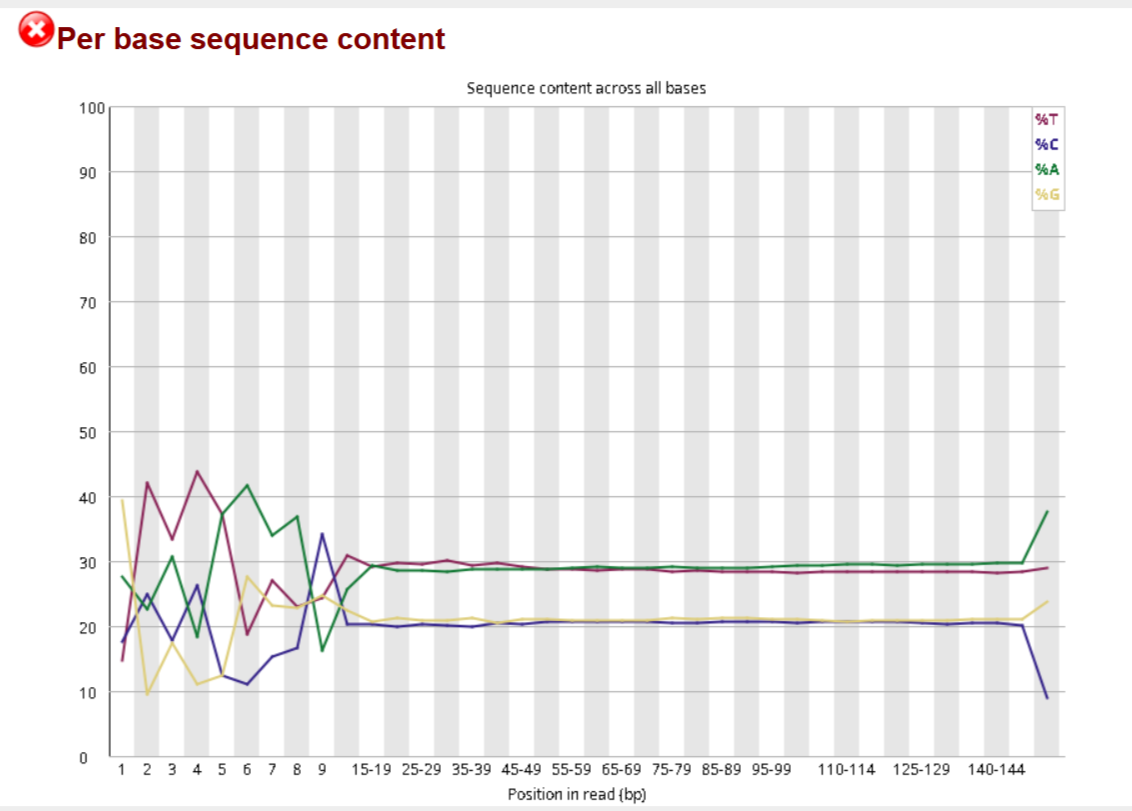

До 10-15 позиции можно обрезать, остальное в отчетах хорошо


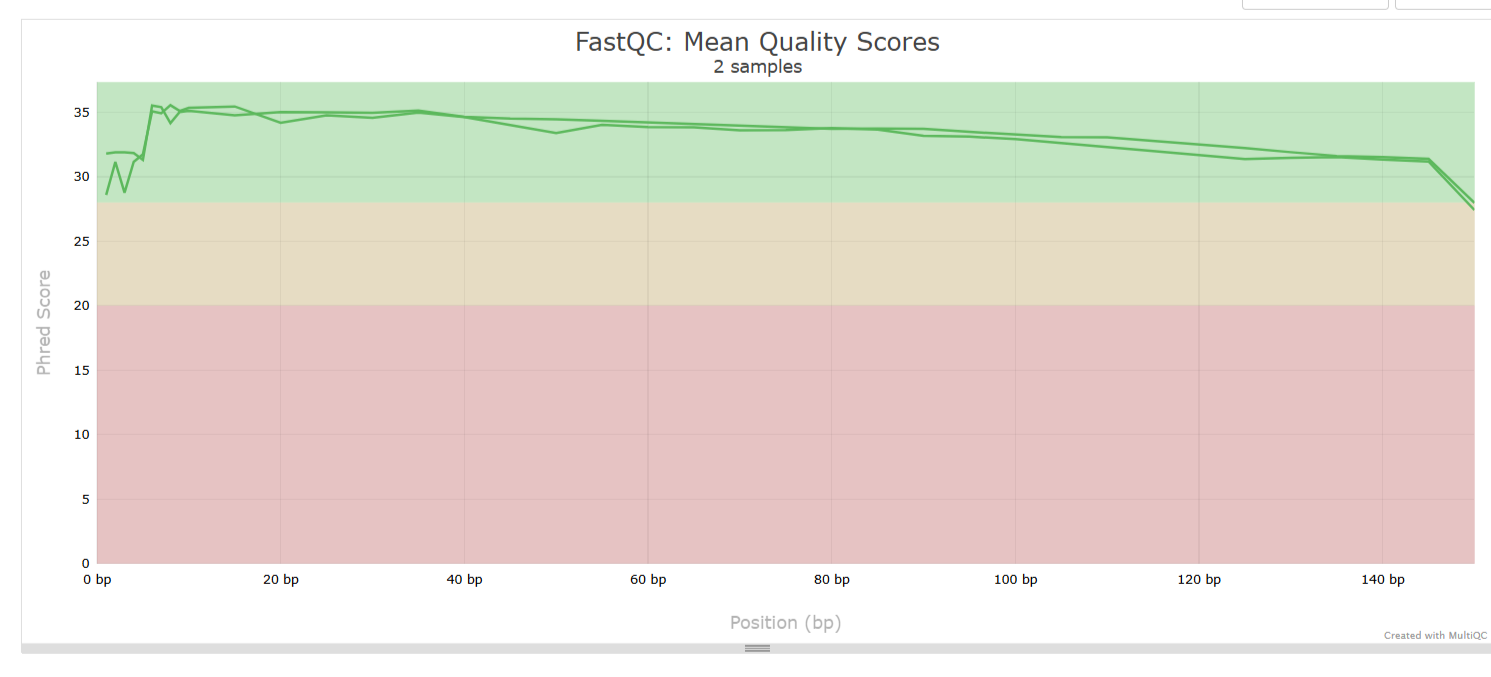

После тримминга качество по позициям улучшилось, поэтому далее будем использовать именно эти файлы.

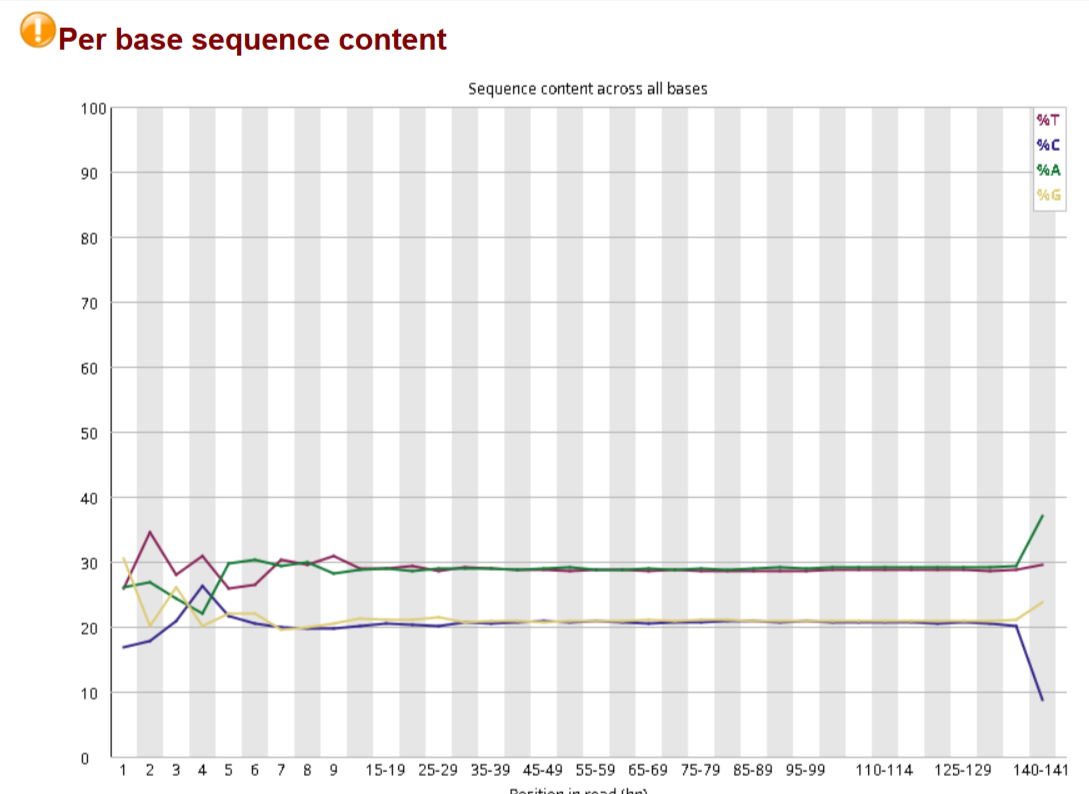

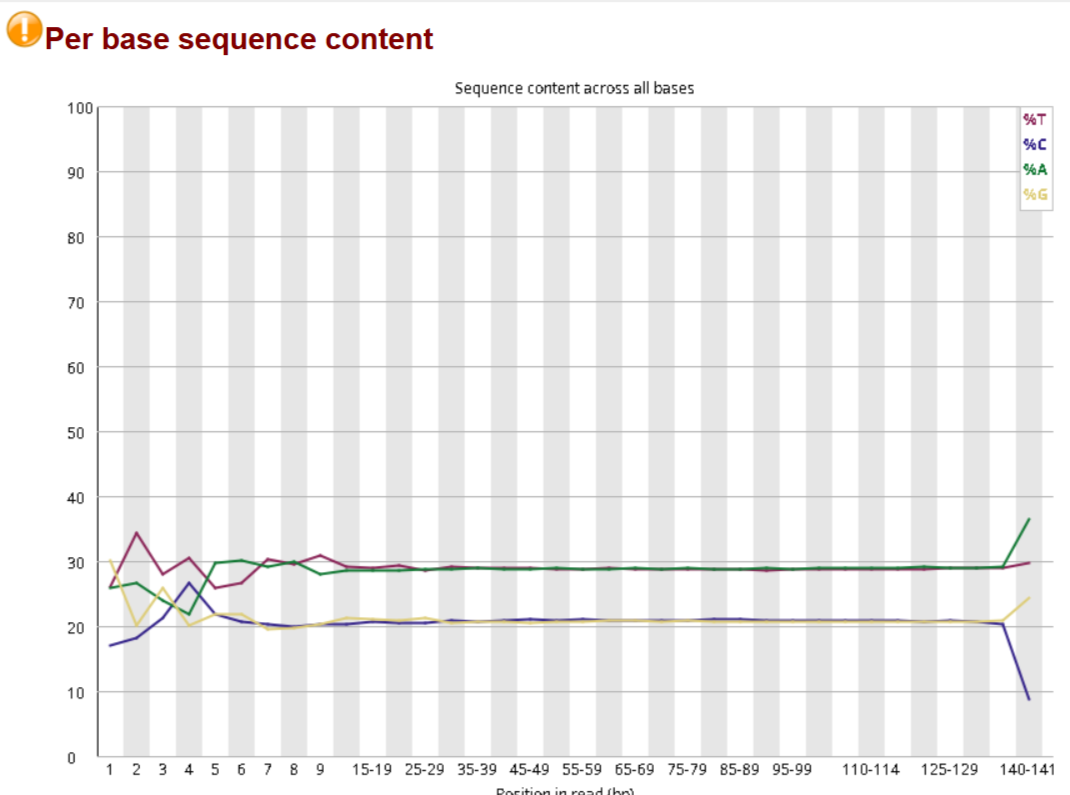

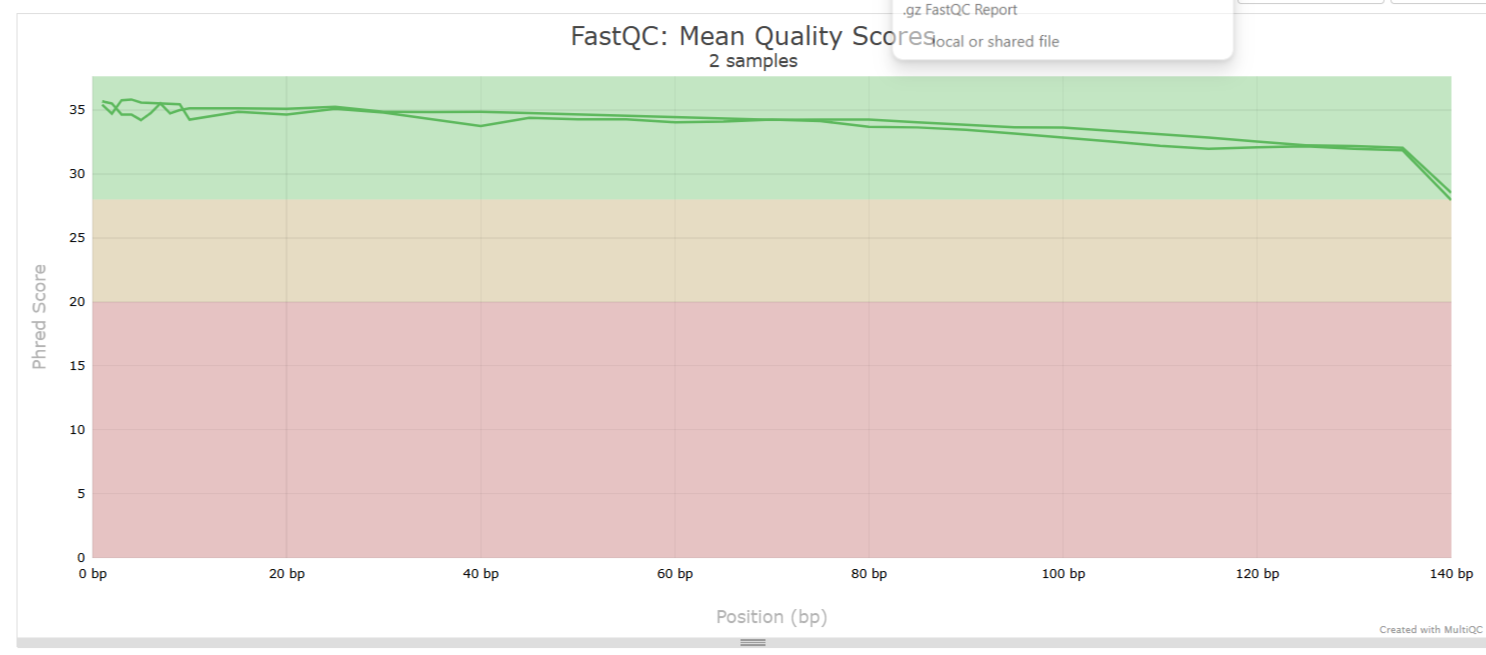

Все остальные параметры не поменялись, т.к. сделала только обрезку первых 10 позиций.

Далее выполним команду для выравнивания ридов на референсный геном:

In [ ]:
STAR --genomeDir /projects/mipt_dbmp_biotechnology/GRCh38/ \
     --readFilesIn trimmed_R1.fastq trimmed_R2.fastq \
     --runThreadN 8 \
     --outFileNamePrefix star_output/ \
     --outSAMtype BAM SortedByCoordinate \
     --quantMode GeneCounts

Далее применим stringtie (скрипты приложены).

GTF (Gene Transfer Format) — это табличный текстовый формат, который описывает структуру генов, транскриптов, экзонов и других элементов на геноме

Каждая строка GTF описывает один элемент (например, ген, транскрипт, экзон) и содержит 9 полей, разделённых табуляцией (\t):

1. seqname      (хромосома)
2. source       (источник аннотации, например: HAVANA, StringTie)
3. feature      (тип элемента: gene, transcript, exon, CDS и др.)
4. start        (начальная координата элемента)
5. end          (конечная координата элемента)
6. score        (оценка — может быть ".", если отсутствует)
7. strand       (+ или -)
8. frame        (рамка считывания: 0, 1, 2 или .)
9. attribute    (доп. информация: ID гена, транскрипта, биотип и др.)


Зачем вообще нужен GTF-файл?

 Обозначает геномные координаты:
Где находятся гены, транскрипты, экзоны, CDS, UTR и др.

Связывает структуру элементов:
Какой экзон принадлежит какому транскрипту.

Какой транскрипт принадлежит какому гену.

Используется в RNA-seq анализе:
Для подсчёта экспрессии генов (например, с featureCounts, htseq-count, STAR --quantMode GeneCounts)

Для сборки новых транскриптов (stringtie, cufflinks)

Для визуализации (в IGV, UCSC Genome Browser)

Позволяет аннотировать новые сборки:
Можно сравнивать предсказанные транскрипты с известной аннотацией.

Вот пример строк из полученного мною файла:

  7002  1       StringTie       transcript      235155088       235160962       1000    -       .       gene_id "STRG.1298"; transcript_id "STRG.1298.3"; reference_id "ENST00000475960"; ref_gene_id "ENSG00000188739"; ref_gene_name "RBM34"; cov "0.951408"; FPKM "2.214688"; TPM "34.568241";
  7003  1       StringTie       exon    235155088       235155112       1000    -       .       gene_id "STRG.1298"; transcript_id "STRG.1298.3"; exon_number "1"; reference_id "ENST00000475960"; ref_gene_id "ENSG00000188739"; ref_gene_name "RBM34"; cov "0.178236";
  7004  1       StringTie       exon    235160511       235160962       1000    -       .       gene_id "STRG.1298"; transcript_id "STRG.1298.3"; exon_number "2"; reference_id "ENST00000475960"; ref_gene_id "ENSG00000188739"; ref_gene_name "RBM34"; cov "0.994172";